In [94]:
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)

player_stats <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")

colnames(player_stats) <- c(X1 = "index",
                       Age = "age",
                       Country = "country",
                       Plays = "plays",
                       Wikipedia = "wiki",
                       "Current Rank" = "current_rank",
                       "Best Rank" = "best_rank",
                       Name = "name",
                       Backhand = "backhand",
                       "Prize Money" = "prize_money", 
                       Height = "height",
                       "Favorite Surface" = "fav_surface",
                       "Turned Pro" = "turned_pro",
                       Seasons = "seasons",
                       Active = "active",
                       "Current Elo Rank" = "elo_rank",
                       "Best Elo Rank" = "best_elo_rank",
                       "Peak Elo Rank" = "peak_elo",
                       "Last Appearance" = "last_app",
                       Titles = "titles",
                       "GOAT Rank" = "goat_rank",
                       "Best Season" = "best_season",
                       Retired = "retired",
                       Masters = "masters",
                       Birthplace = "birthplace",
                       Residence = "res",
                       Weight = "weight",
                       Coach = "coach",
                       Facebook = "facebook",
                       Twitter = "twitter",
                       Nicknames = "nicknames",
                       "Grand Slams" = "grand_slams",
                       "Davis Cups" = "davis_cups",
                       "Web Site" = "website",
                         "Team Cups" = "team_cups",
                       Olympics = "olympics",
                       "Weeks at No. 1" = "weeks_at_top",
                       "Tour Finals" = "tour_finals")

tidy_player_stats <- player_stats %>%
    filter(active == "Yes") %>%
    filter(!is.na(goat_rank)) %>%
    filter(!is.na(titles)) %>%
    select(current_rank, best_rank, turned_pro, seasons, elo_rank, best_elo_rank, peak_elo, goat_rank, titles) %>%
    extract(col = current_rank, "current_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = best_rank, "best_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = elo_rank, "elo_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = best_elo_rank, "best_elo_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = peak_elo, "peak_elo_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = goat_rank, "goat_rank" , remove = TRUE, convert = TRUE) %>%
    arrange(goat_rank)

head(tidy_player_stats)


tidy_player_stats <- as_tibble(tidy_player_stats)

tennis_scaled <- tidy_player_stats %>% 
        mutate(scaled_titles = scale(titles), 
       scaled_best_elo_rank = scale(best_elo_rank),
       scaled_peak_elo_rank = scale(peak_elo_rank),
       scaled_best_rank = scale(best_rank))


head(tennis_scaled)
tail(tennis_scaled)


set.seed(9999)
tidy_player_stats_split <- initial_split(tennis_scaled, prop = 0.75, strata = goat_rank)
tennis_train <- training(tidy_player_stats_split)
tennis_test <- testing(tidy_player_stats_split)

tennis_train <- tennis_train %>%
    mutate(goat_rank = as_factor(goat_rank))

tennis_test <- tennis_test %>%
    mutate(goat_rank = as_factor(goat_rank))


#if we scaled first 

head(tennis_train)




Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo_rank,goat_rank,titles
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
3,1,1998,22,3,1,2550,1,103
2,1,2003,17,2,1,2629,2,77
1,1,2001,19,1,1,2552,3,84
128,1,2005,15,7,2,2500,12,46
121,3,2005,14,4,3,2329,33,22
15,3,2002,18,12,5,2291,36,16


current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo_rank,goat_rank,titles,scaled_titles,scaled_best_elo_rank,scaled_peak_elo_rank,scaled_best_rank
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
3,1,1998,22,3,1,2550,1,103,5.8968041,-1.324819,3.161440,-1.238344
2,1,2003,17,2,1,2629,2,77,4.2849488,-1.324819,3.679439,-1.238344
1,1,2001,19,1,1,2552,3,84,4.7189098,-1.324819,3.174554,-1.238344
128,1,2005,15,7,2,2500,12,46,2.3631212,-1.271849,2.833592,-1.238344
121,3,2005,14,4,3,2329,33,22,0.8752548,-1.218879,1.712353,-1.113638
15,3,2002,18,12,5,2291,36,16,0.5032882,-1.112939,1.463188,-1.113638


current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo_rank,goat_rank,titles,scaled_titles,scaled_best_elo_rank,scaled_peak_elo_rank,scaled_best_rank
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
116,33,2003,13,141,62,1895,489,1,-0.4266284,1.9063501,-1.1333663,0.756952
49,39,2008,10,62,45,1936,489,1,-0.4266284,1.0058603,-0.8645311,1.131070
109,35,2009,7,94,38,1953,489,1,-0.4266284,0.6350703,-0.7530629,0.881658
120,39,2006,9,89,45,1935,489,1,-0.4266284,1.0058603,-0.8710881,1.131070
71,58,NA,7,44,43,1952,489,1,-0.4266284,0.8999203,-0.7596198,2.315777
292,74,2008,7,143,57,1904,489,1,-0.4266284,1.6415002,-1.0743537,3.313425


current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo_rank,goat_rank,titles,scaled_titles,scaled_best_elo_rank,scaled_peak_elo_rank,scaled_best_rank
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
3,1,1998,22,3,1,2550,1,103,5.8968041,-1.324819,3.161440,-1.2383439
128,1,2005,15,7,2,2500,12,46,2.3631212,-1.271849,2.833592,-1.2383439
121,3,2005,14,4,3,2329,33,22,0.8752548,-1.218879,1.712353,-1.1136379
18,4,2007,13,10,4,2296,49,12,0.2553104,-1.165909,1.495973,-1.0512849
33,5,2004,16,20,6,2244,49,18,0.6272770,-1.059969,1.155011,-0.9889319
7,3,2013,8,13,5,2231,65,11,0.1933160,-1.112939,1.069771,-1.1136379


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 1 rows containing missing values (position_stack).”


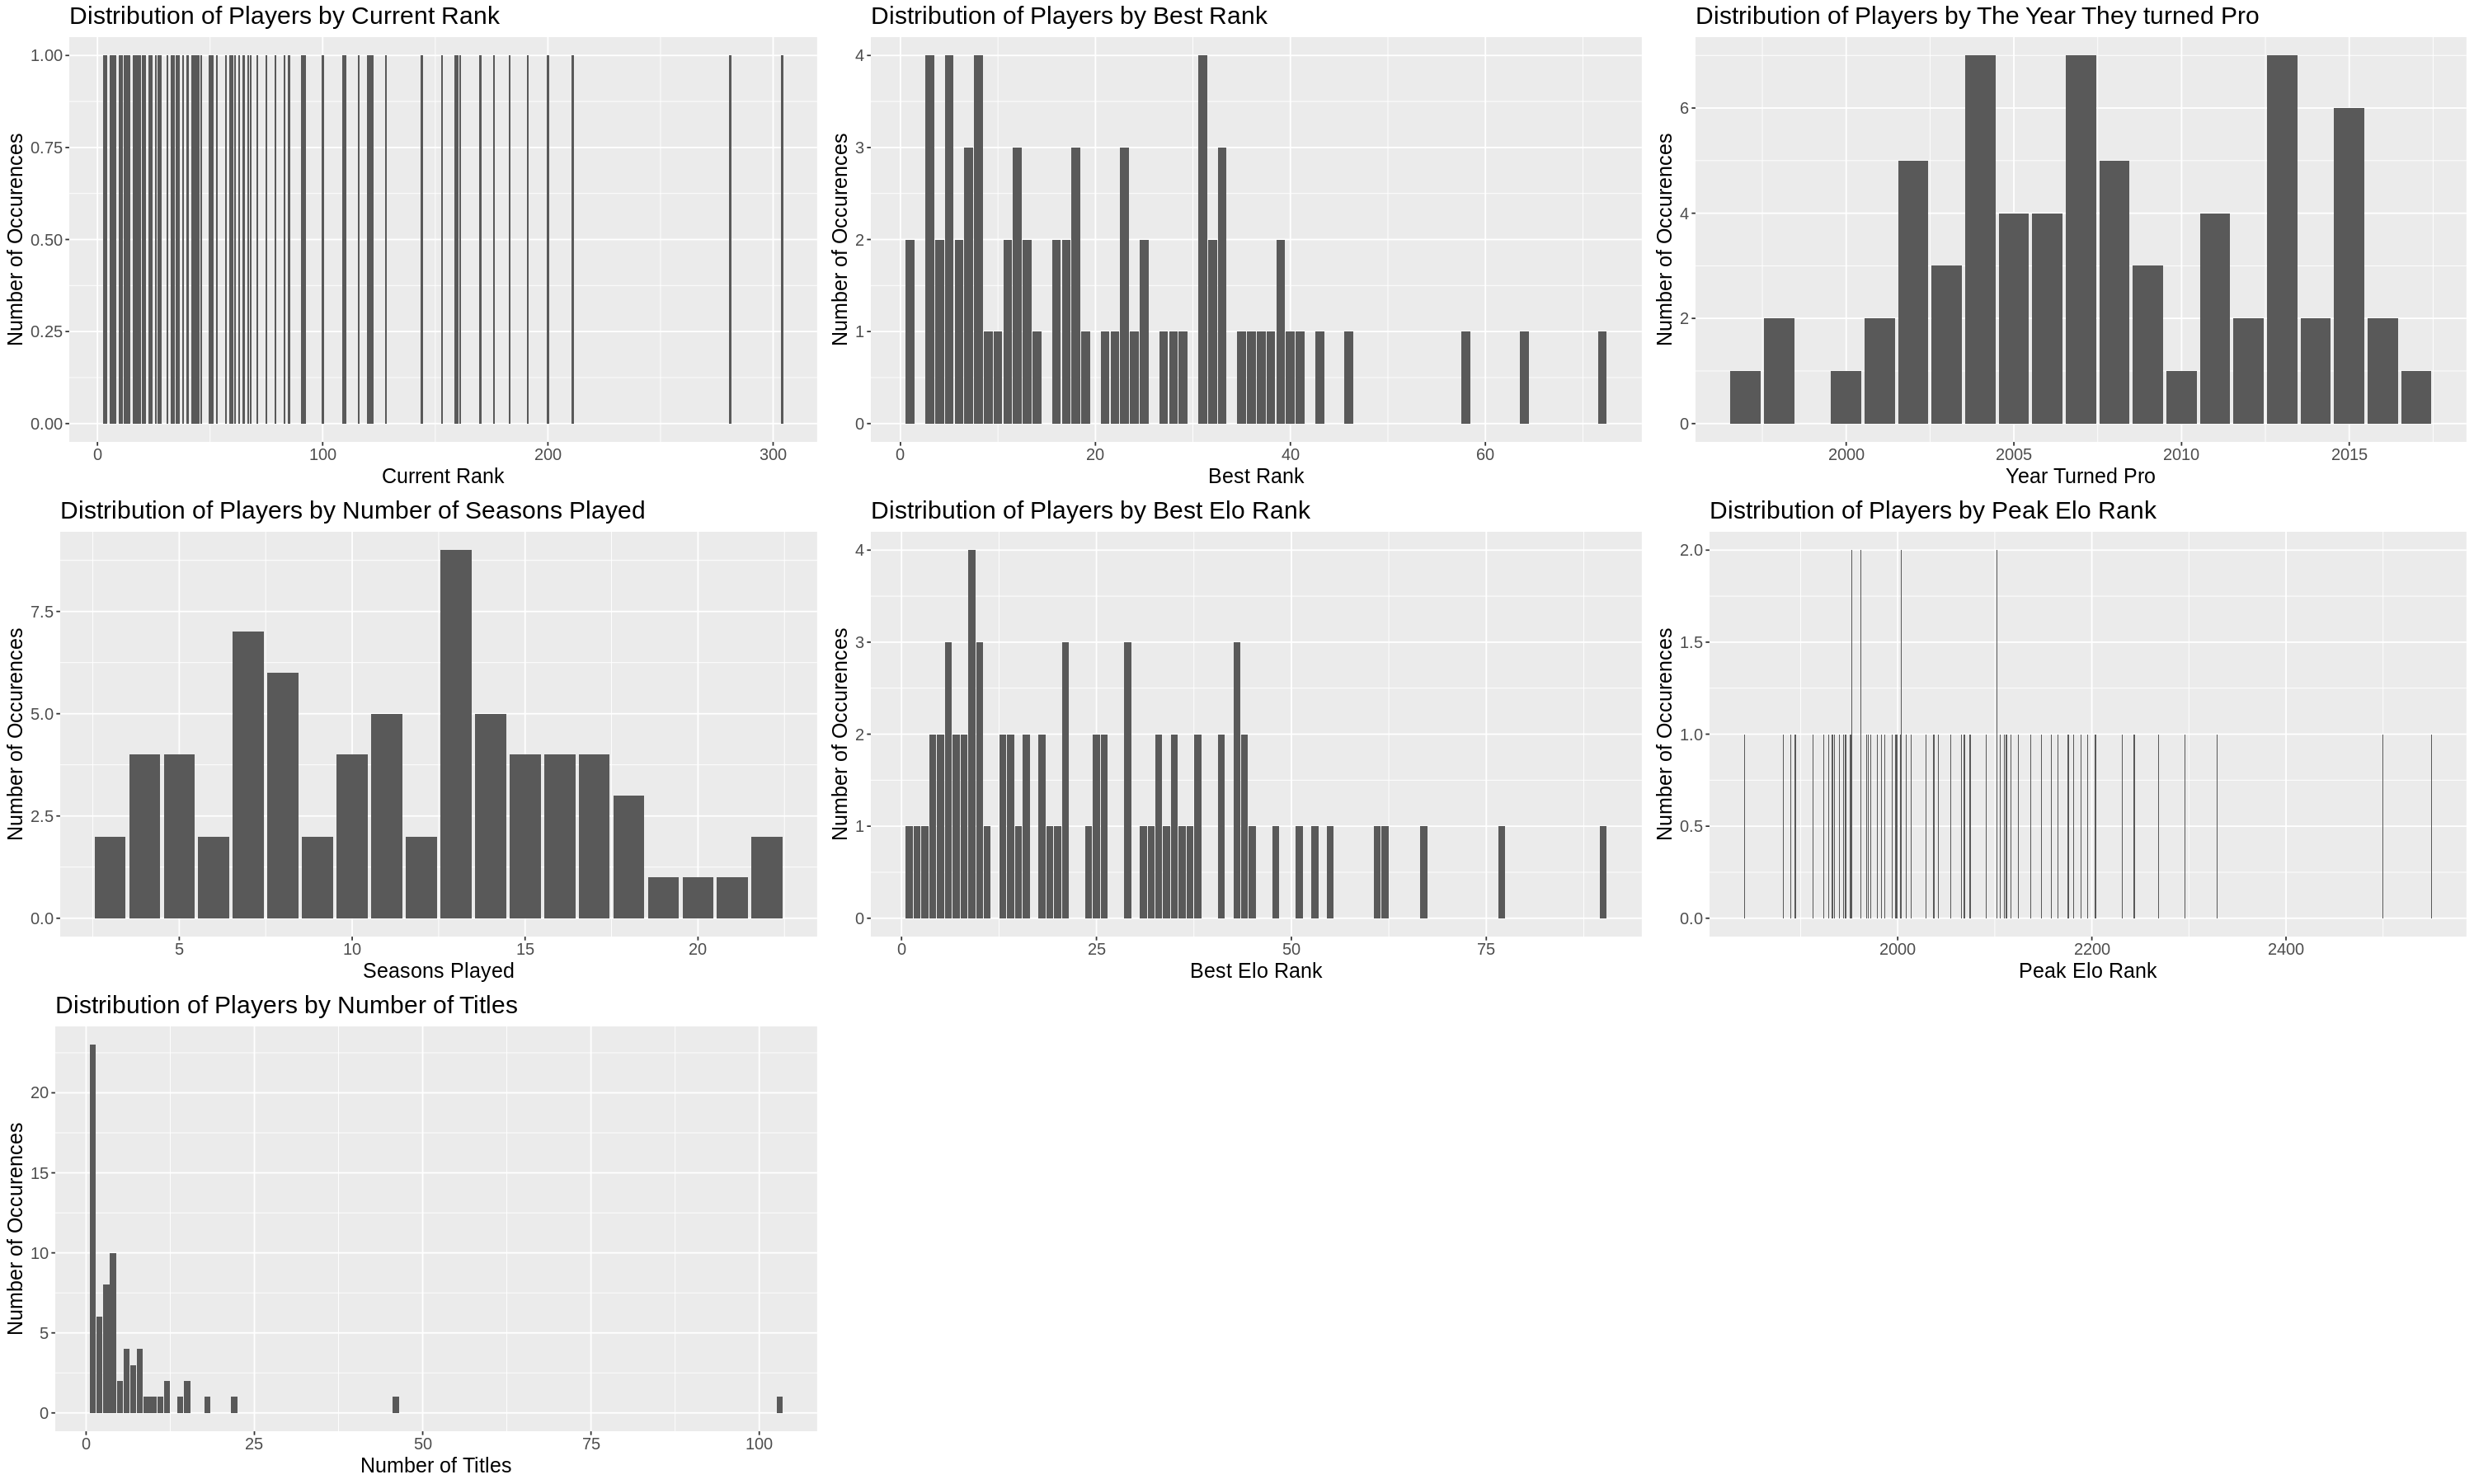

In [95]:
#predictor variablesa
current_rank_distribution <- tennis_train %>%
    group_by(current_rank) %>%
    summarize(n=n())
best_rank_distribution <- tennis_train %>%
    group_by(best_rank) %>%
    summarize(n=n())
turned_pro_distribution <- tennis_train %>%
    group_by(turned_pro) %>%
    summarize(n=n())
seasons_distribution <- tennis_train %>%
    group_by(seasons) %>%
    summarize(n=n())
best_elo_rank_distribution <- tennis_train %>%
    group_by(best_elo_rank) %>%
    summarize(n=n())
peak_elo_distribution <- tennis_train %>%
    group_by(peak_elo_rank) %>%
    summarize(n=n())
titles_distribution <- tennis_train %>%
    group_by(titles) %>%
    summarize(n=n())

options(repr.plot.width = 8, repr.plot.height = 8)
#predictor variables
current_rank_plot <- current_rank_distribution %>%
    ggplot(aes(x = current_rank, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Current Rank", x = "Current Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#current_rank_plot
best_rank_plot <- best_rank_distribution %>%
    ggplot(aes(x = best_rank, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Best Rank", x = "Best Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#best_rank_plot
turned_pro_plot <- turned_pro_distribution %>%
    ggplot(aes(x = turned_pro, y = n)) +
    geom_bar(stat = "identity") +

    labs(title = "Distribution of Players by The Year They turned Pro", x = "Year Turned Pro", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#turned_pro_plot
seasons_plot <- seasons_distribution %>%
    ggplot(aes(x = seasons, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Number of Seasons Played", x = "Seasons Played", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#seasons_plot
best_elo_rank_plot <- best_elo_rank_distribution %>%
    ggplot(aes(x = best_elo_rank, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Best Elo Rank", x = "Best Elo Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#best_elo_rank_plot
peak_elo_plot <- peak_elo_distribution %>%
    ggplot(aes(x = peak_elo_rank, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Peak Elo Rank", x = "Peak Elo Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#peak_elo_plot
titles_plot <- titles_distribution %>%
    ggplot(aes(x = titles, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Number of Titles", x = "Number of Titles", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#titles_plot

options(repr.plot.width = 25, repr.plot.height = 15)
grid.arrange(current_rank_plot, best_rank_plot, turned_pro_plot, seasons_plot, best_elo_rank_plot, peak_elo_plot, titles_plot)


Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


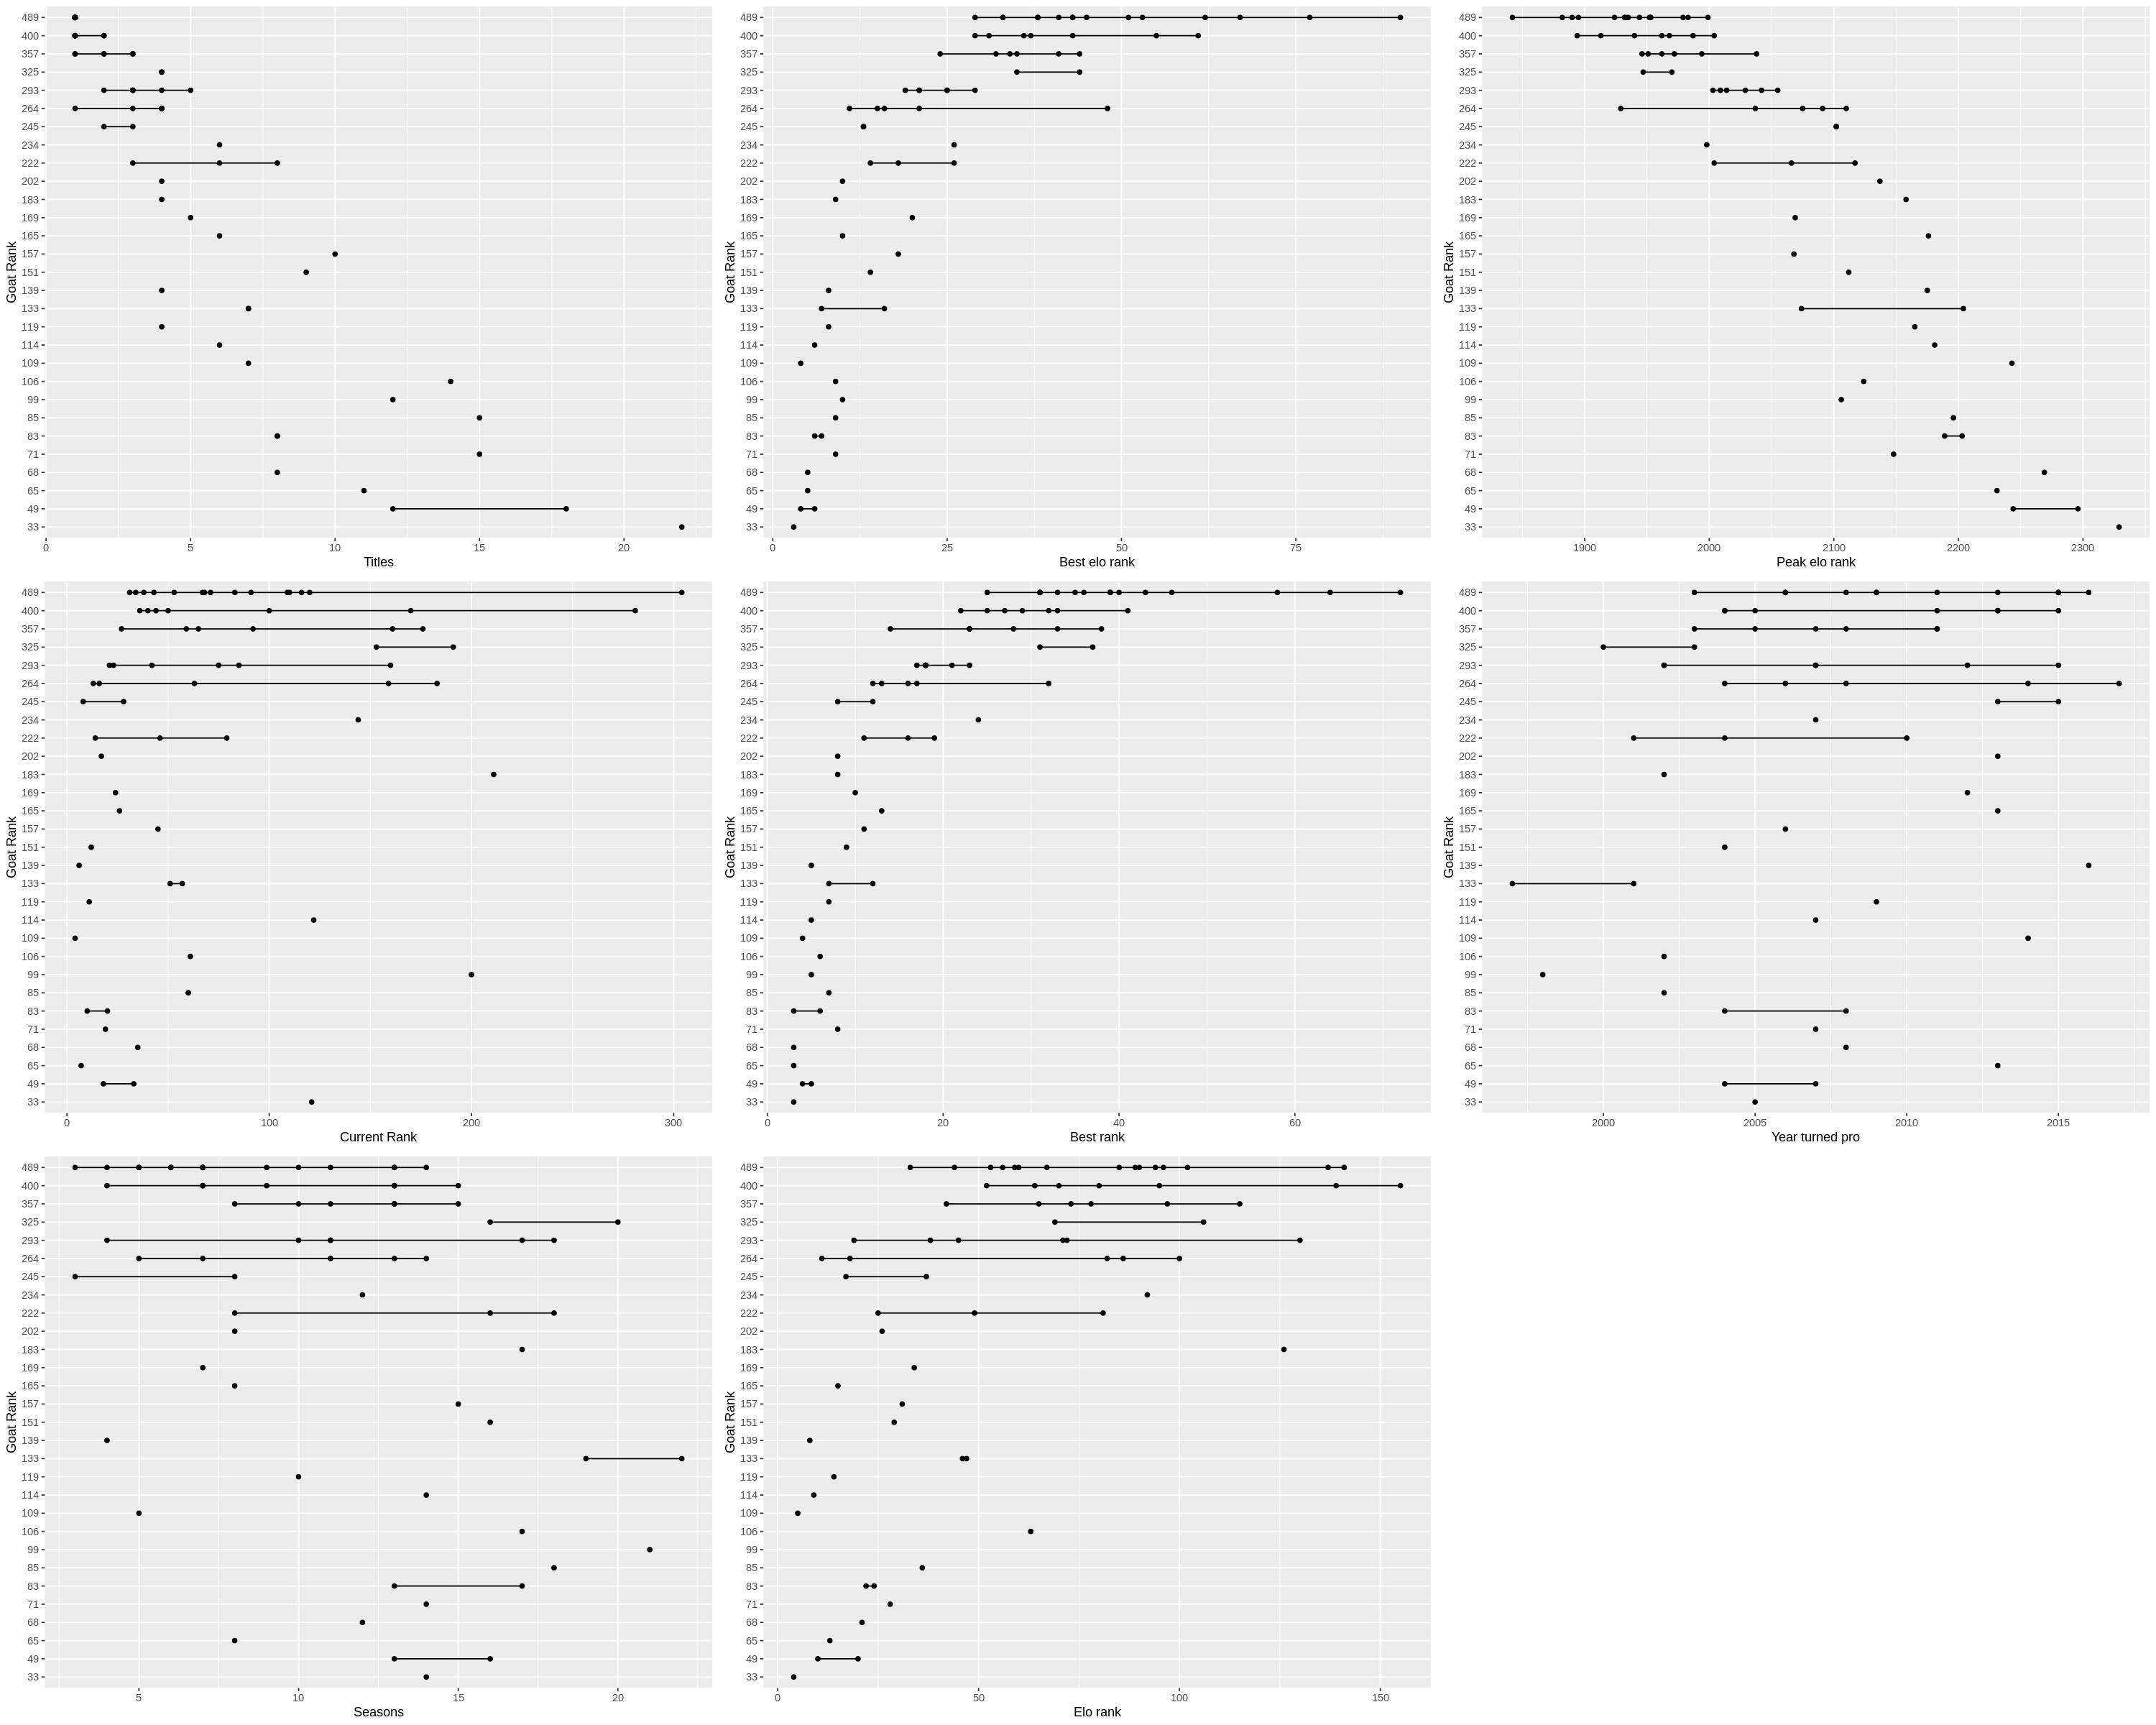

In [110]:
#EDAS                                     
tennis_eda<- tennis_train %>%
    ggplot(aes(x=titles, y=goat_rank)) + geom_point()+  geom_line() +
    labs(x="Titles", y= "Goat Rank")

eda2<- tennis_train %>%
    ggplot(aes(x=best_elo_rank, y=goat_rank)) + geom_point() +geom_line() +
    labs(x="Best elo rank", y= "Goat Rank")


eda3<- tennis_train %>%
    ggplot(aes(x=peak_elo_rank, y=goat_rank)) + geom_point() +geom_line() +
    labs(x="Peak elo rank", y= "Goat Rank")


eda4<- tennis_train %>%
    ggplot(aes(x=current_rank, y=goat_rank)) + geom_point() +geom_line() +
    labs(x="Current Rank", y= "Goat Rank")


eda5<- tennis_train %>%
    ggplot(aes(x=best_rank, y=goat_rank)) + geom_point()  +geom_line() +
    labs(x="Best rank", y= "Goat Rank")


eda6<- tennis_train %>%
    ggplot(aes(x=turned_pro, y=goat_rank)) + geom_point()  +geom_line() +
    labs(x="Year turned pro", y= "Goat Rank")


eda7<- tennis_train %>%
    ggplot(aes(x=seasons, y=goat_rank)) + geom_point()  +geom_line() +
    labs(x="Seasons", y= "Goat Rank")


eda8<- tennis_train %>%
    ggplot(aes(x=elo_rank, y=goat_rank)) + geom_point()  +geom_line() +
    labs(x="Elo rank", y= "Goat Rank")


options(repr.plot.width = 25, repr.plot.height = 20)
grid.arrange(tennis_eda, eda2, eda3, eda4, eda5, eda6, eda7,eda8)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



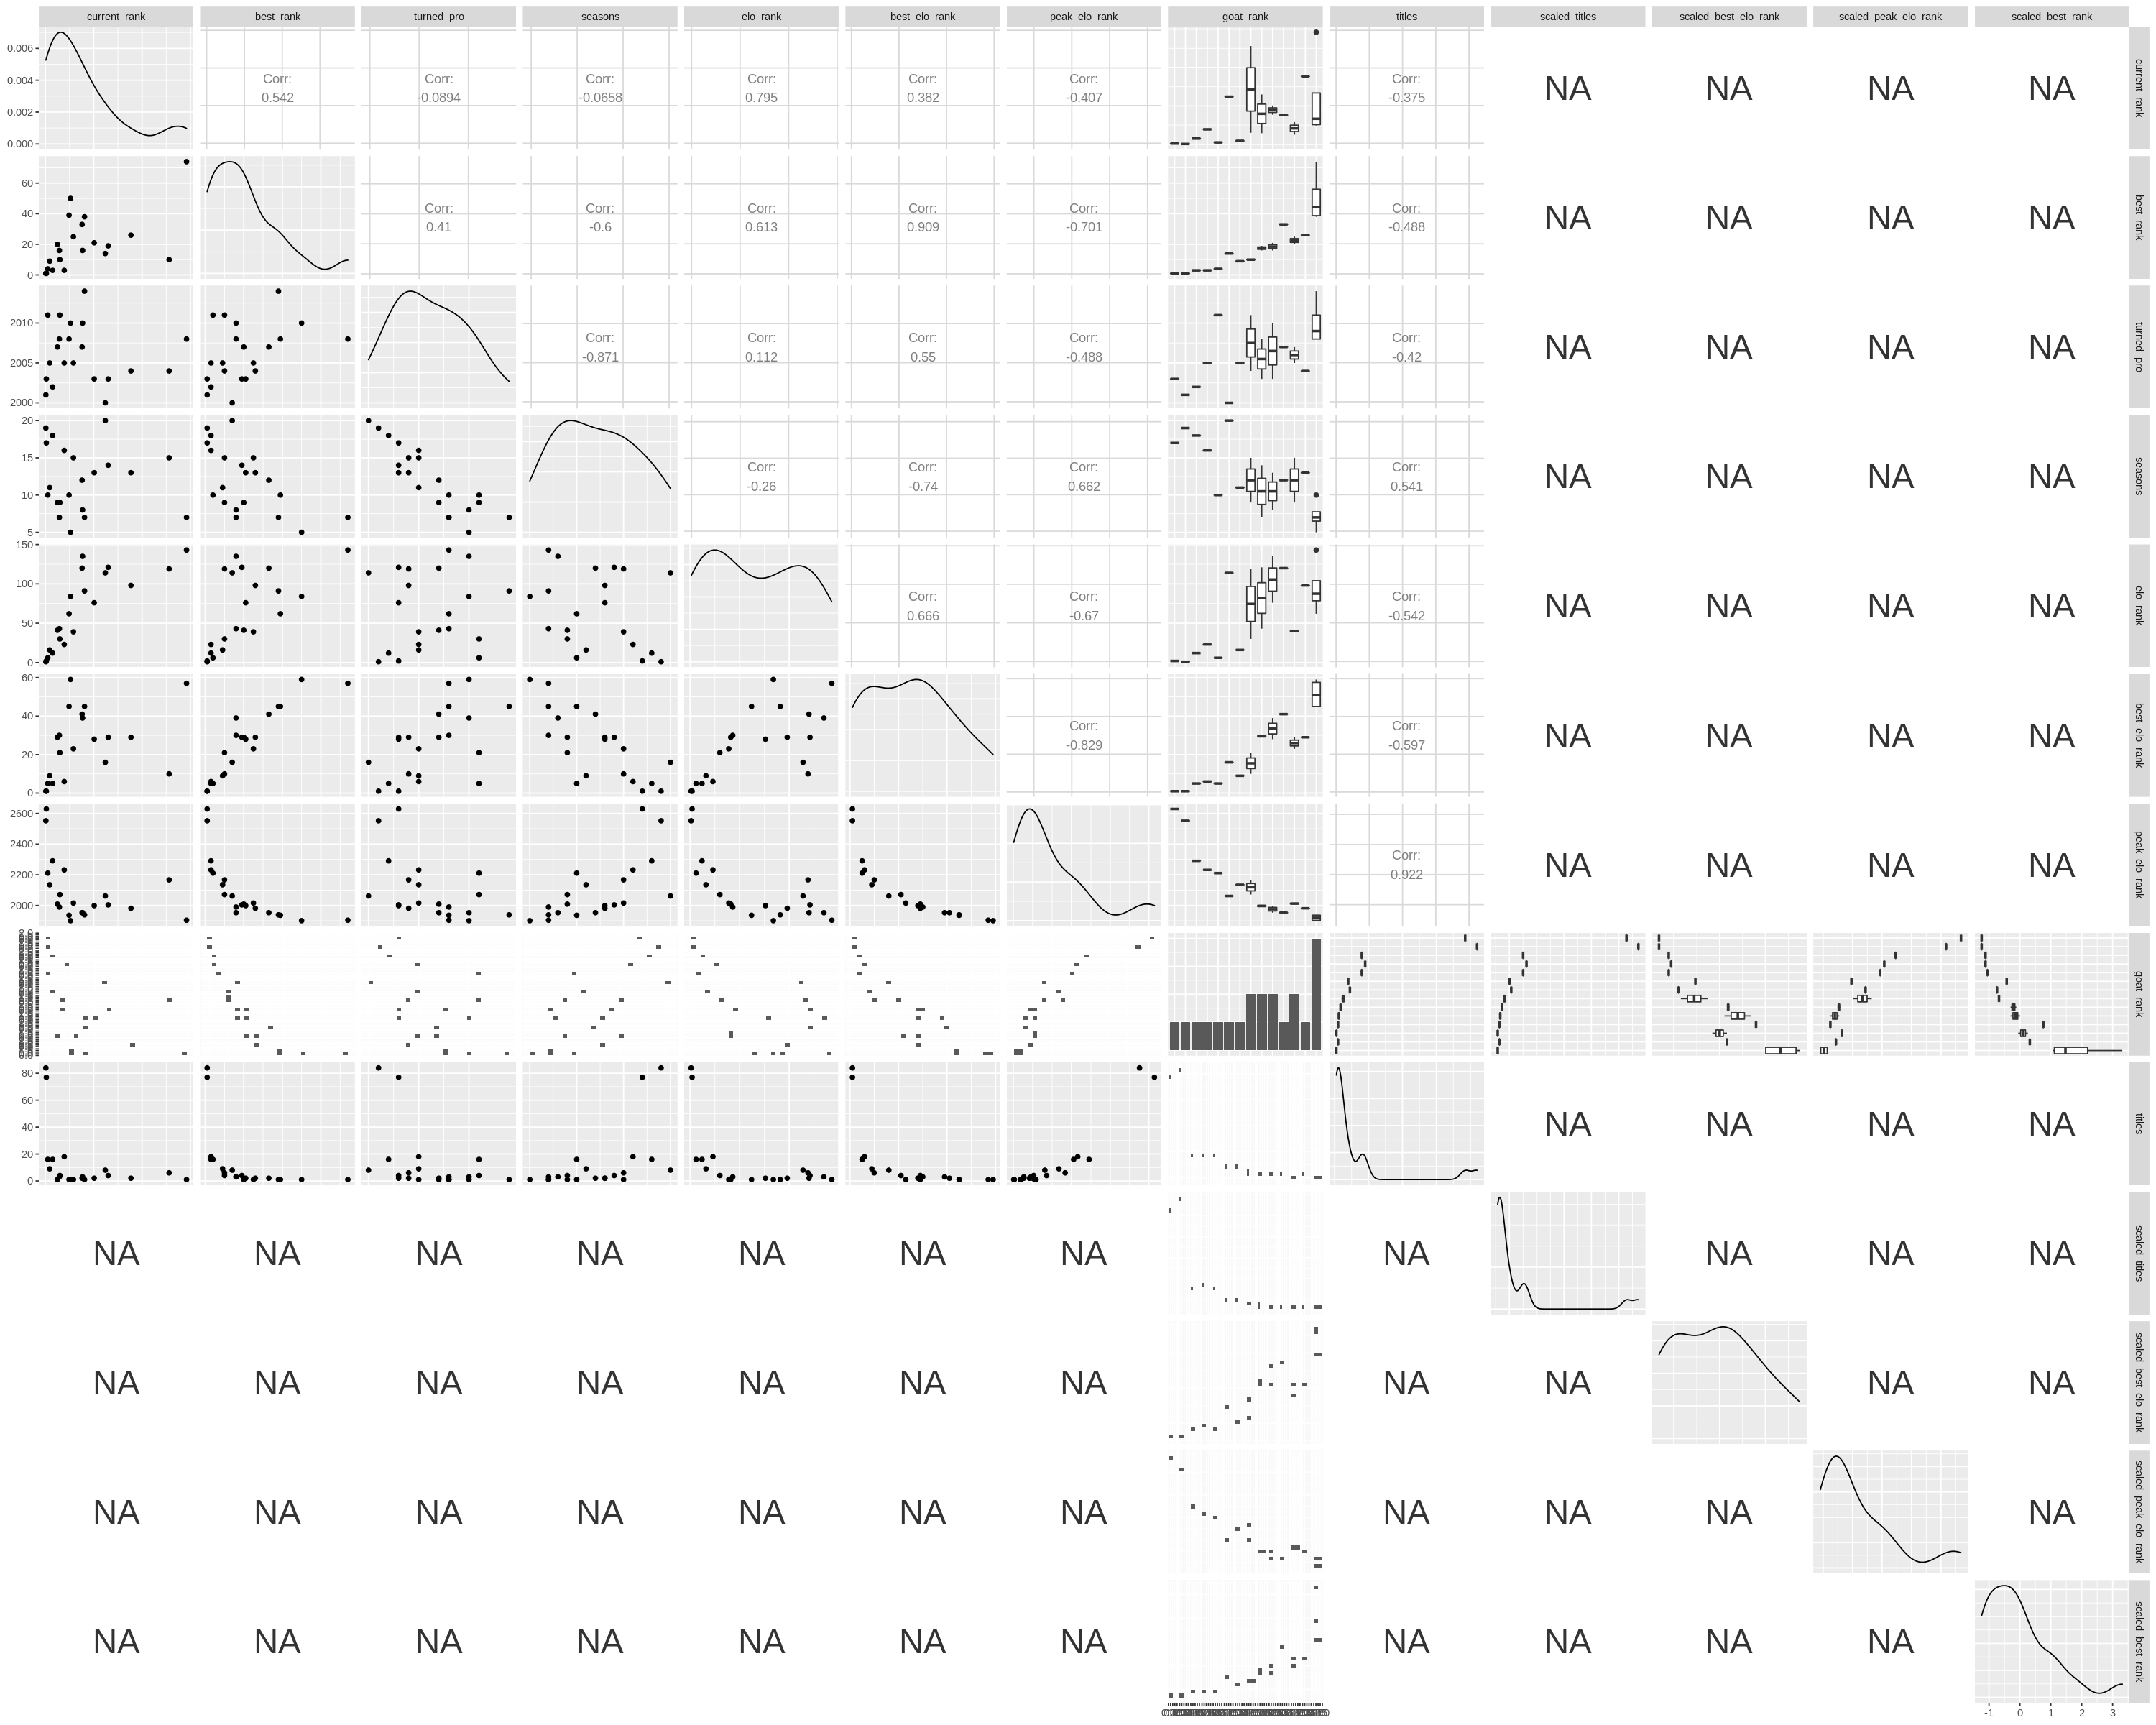

In [103]:
library(GGally)
ggpairs(tennis_test)4

In [104]:
#KNN REGRESSION:
tennis_train <- tennis_train %>%
    filter(scaled_titles < 2)

#KNN Regression
set.seed(1234)
tennis_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>%
    set_mode("regression") 

tennis_recipe <- recipe(goat_rank ~scaled_best_elo_rank , data = tennis_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
 
tennis_recipe

tennis_vfold <- vfold_cv(tennis_train, v=5, strata = goat_rank)

tennis_workflow <- workflow() %>%
    add_recipe(tennis_recipe) %>%
    add_model(tennis_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 50))

tennis_results <- tennis_workflow %>%
    tune_grid(resamples = tennis_vfold, grid = gridvals) %>%
    collect_metrics()

#minimum RMSPE
tennis_min <- tennis_results %>%
   filter(.metric == "rmse") %>%
   arrange(mean) %>% 
   slice(1)

tennis_min

k_min <- tennis_min %>%
         pull(neighbors)

tennis_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
         set_engine("kknn") %>%
         set_mode("regression")

tennis_best_fit <- workflow() %>%
    add_recipe(tennis_recipe) %>%
    add_model(tennis_best_spec) %>%
    fit(data=tennis_train)

tennis_summary <- tennis_best_fit %>%
    predict(tennis_test) %>%
    bind_cols(tennis_test) %>%
    metrics(truth = goat_rank, estimate = .pred)

tennis_summary





Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          1

Operations:

Scaling for all_predictors()
Centering for all_predictors()

x Fold1: model 1/1 (predictions): Error: `kknn` model does not appear to use nume...

x Fold2: model 1/1 (predictions): Error: `kknn` model does not appear to use nume...

x Fold3: model 1/1 (predictions): Error: `kknn` model does not appear to use nume...

x Fold4: model 1/1 (predictions): Error: `kknn` model does not appear to use nume...

x Fold5: model 1/1 (predictions): Error: `kknn` model does not appear to use nume...

Warning message:
“All models failed in tune_grid(). See the `.notes` column.”


ERROR: Error: All of the models failed. See the .notes column.


Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”
Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
         (Intercept)  scaled_best_elo_rank  
              20.772                 6.453  


`geom_smooth()` using formula 'y ~ x'



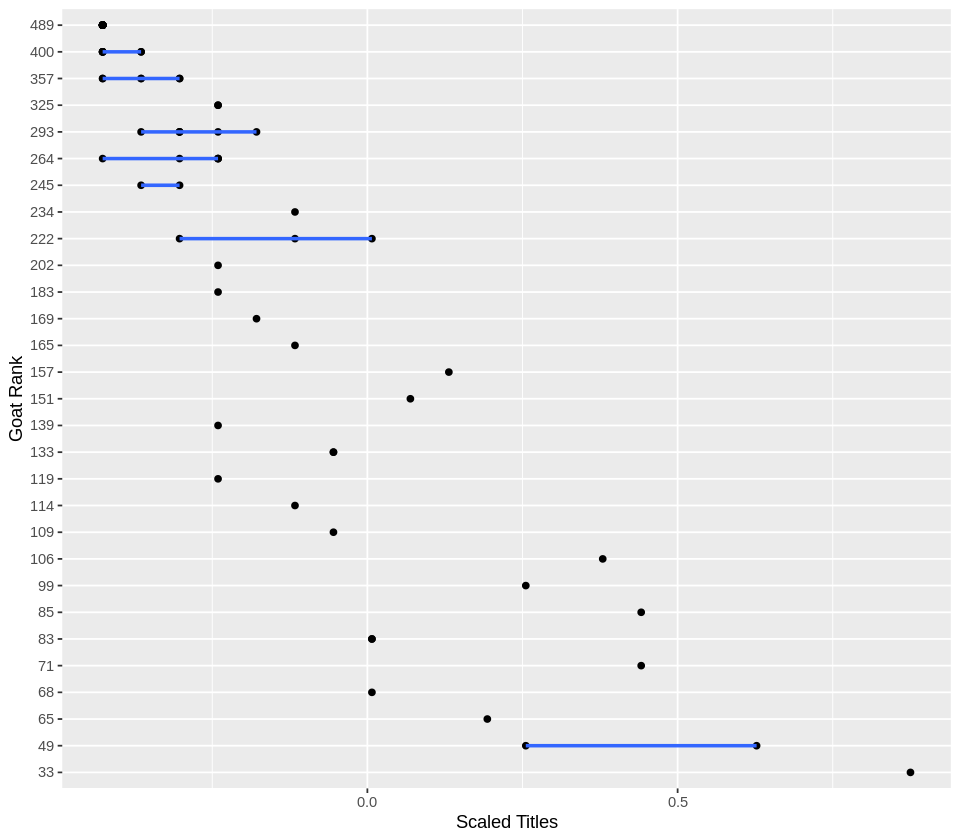

In [105]:
#LINEAR REGRESSION
tennis_filtered<- tennis_train %>%
    filter(scaled_titles<2)

lm_spec<- linear_reg() %>%
    set_engine("lm") %>%
    set_mode("regression")

lm_recipe <- recipe(goat_rank ~  scaled_best_elo_rank, data = tennis_filtered) 
lm_fit <- workflow() %>%
       add_recipe(lm_recipe) %>%
       add_model(lm_spec) %>%
       fit(data=tennis_filtered)

lm_fit

options(repr.plot.width = 8, repr.plot.height = 7)

lm_predictions<- tennis_filtered%>%
    ggplot(aes(x=scaled_titles, y=goat_rank)) +geom_point() + geom_smooth(method="lm", se=FALSE) +
    labs(x="Scaled Titles" , y="Goat Rank")
lm_predictions 

In [106]:
head(tennis_train)

current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo_rank,goat_rank,titles,scaled_titles,scaled_best_elo_rank,scaled_peak_elo_rank,scaled_best_rank
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
121,3,2005,14,4,3,2329,33,22,0.875254780,-1.2188794,1.7123525,-1.1136379
18,4,2007,13,10,4,2296,49,12,0.255310419,-1.1659094,1.4959730,-1.0512849
33,5,2004,16,20,6,2244,49,18,0.627277035,-1.0599694,1.1550113,-0.9889319
7,3,2013,8,13,5,2231,65,11,0.193315983,-1.1129394,1.0697709,-1.1136379
35,3,2008,12,21,5,2269,68,8,0.007332675,-1.1129394,1.3189352,-1.1136379
19,8,2007,14,28,9,2148,71,15,0.441293727,-0.9010594,0.5255435,-0.8018730


In [107]:
lm_test_results <- lm_fit %>%
        predict(tennis_test) %>%
        bind_cols(tennis_test) 
#         metrics(truth = goat_rank, estimate = .pred)
lm_test_results

lm_rmspe <- lm_test_results %>%
         filter(.metric== "rmse") %>%
         select(.estimate) %>%
         pull()

lm_rmspe

.pred,current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo_rank,goat_rank,titles,scaled_titles,scaled_best_elo_rank,scaled_peak_elo_rank,scaled_best_rank
<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
12.22222,2,1,2003,17,2,1,2629,2,77,4.284948761,-1.3248193,3.67943930,-1.23834393
12.22222,1,1,2001,19,1,1,2552,3,84,4.718909813,-1.3248193,3.17455370,-1.23834393
13.58953,15,3,2002,18,12,5,2291,36,16,0.503288163,-1.1129394,1.46318822,-1.11363794
13.93136,39,3,2005,16,23,6,2232,53,18,0.627277035,-1.0599694,1.07632783,-1.11363794
13.58953,5,4,2011,10,6,5,2211,58,16,0.503288163,-1.1129394,0.93863175,-1.05128494
17.34965,124,14,2000,20,114,16,2062,133,8,0.007332675,-0.5302695,-0.03835467,-0.42775497
14.95685,9,9,2005,11,16,9,2135,151,9,0.069327111,-0.9010594,0.44030311,-0.73951996
19.05879,30,10,2011,9,30,21,2071,202,4,-0.240645069,-0.2654195,0.02065794,-0.67716696
15.29868,256,10,2004,15,119,10,2167,202,6,-0.116656197,-0.8480894,0.65012570,-0.67716696


ERROR: Error: Problem with `filter()` input `..1`.
[31m✖[39m object '.metric' not found
[34mℹ[39m Input `..1` is `.metric == "rmse"`.


In [ ]:





#tennis_recipe <- recipe(goat_rank ~ titles + current_rank + best_elo_rank , data = tidy_player_stats_training) %>%
   #step_scale(all_predictors()) %>%
   #step_center(all_predictors())
#tennis_recipe

tidy_player_stats_training <- tidy_player_stats_training %>%
    mutate(goat_rank = as_factor(goat_rank))

training_vfold <- vfold_cv(tidy_player_stats_training, v=5, strata = goat_rank)

training_recipe <- recipe(goat_rank ~ titles + best_elo_rank, data = tidy_player_stats_training) %>%
    step_scale(all_predictors()) %>%
   step_center(all_predictors())

training_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

training_resample_fit <- workflow() %>%
      add_recipe(training_recipe) %>%
      add_model(training_spec) %>%
      fit_resamples(resamples = training_vfold)

training_metrics <- collect_metrics(training_resample_fit)
training_metrics

training_results <- workflow() %>%
    add_recipe(training_recipe) %>%
    add_model(training_spec) %>%
tune_grid(resamples = training_vfold, grid = 10) %>%
collect_metrics()

accuracies <- training_results %>%
    filter(.metric == "accuracy")

cross_val_plot <- accuracies %>% 
    ggplot(aes(x=neighbors, y=mean)) +
    geom_point() +
    geom_line() +
    labs(x="Neigbors", y= "Accuracy Estimate")

cross_val_plot

#current_rank, best_rank, turned_pro, seasons, elo_rank, best_elo_rank, peak_elo, goat_rank, titles


In [ ]:
set.seed(9999)

tennis_spec <- nearest_neighbor(weight_func="rectangular", neighbors=tune()) %>%
    set_engine("kknn") %>%
    set_mode("regression")

tennis_recipe <- tidy_player_stats_training %>%
    recipe(goat_rank ~ titles + current_rank + best_elo_rank + peak_elo + best_rank) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
tennis_recipe

training_vfold <- vfold_cv(tidy_player_stats_training, v=5, strata = goat_rank)

training_results <- workflow() %>%
    add_recipe(tennis_recipe) %>%
    add_model(tennis_spec) 
training_results

gridvals<- tibble(neighbors=seq(1,100))

tennis_results <- training_results %>%
    tune_grid(resamples=training_vfold, grid=gridvals) %>%
    collect_metrics()
tennis_results



In [ ]:
#DISCUSSION
summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?

Through this experiment, we found that the more titles you have and 